In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("nhek.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,330.32,158.99,131.81,356.89,109.52,272.16,291.63,225.40,48.63,253.39,46.73,213.38
1,298.76,93.50,298.51,200.29,481.26,402.34,431.68,451.37,641.88,579.43,137.95,341.83
2,311.35,215.01,229.64,484.50,106.98,134.00,309.13,347.29,82.53,372.39,91.39,184.27
3,272.19,148.33,240.35,104.86,306.75,220.14,456.49,392.12,223.88,364.60,93.64,169.59
4,282.97,225.07,518.44,157.87,177.15,359.00,682.67,709.45,272.43,1012.60,117.21,119.69
...,...,...,...,...,...,...,...,...,...,...,...,...
9665,202.91,75.60,41.50,151.73,79.92,28.28,34.42,67.17,32.07,53.40,199.67,109.52
9666,216.55,81.60,32.33,218.17,59.42,36.67,50.67,89.71,36.51,65.78,257.43,134.24
9667,210.09,105.64,32.70,156.12,76.70,46.10,56.67,113.44,39.89,48.84,274.07,120.59
9668,503.69,151.61,520.96,101.77,321.75,394.72,484.63,471.94,471.11,621.01,302.80,204.59


In [5]:
normalized_features = Normalizer().fit_transform(features)

In [6]:
normalized_features = pd.DataFrame(normalized_features) 

In [7]:
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 

In [8]:
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.421093,0.202681,0.168032,0.454964,0.139616,0.346950,0.371771,0.287341,0.061994,0.323022,0.059572,0.272017
1,0.217062,0.067932,0.216880,0.145519,0.349656,0.292318,0.313634,0.327940,0.466354,0.420981,0.100227,0.248354
2,0.334958,0.231313,0.247052,0.521236,0.115092,0.144160,0.332569,0.373623,0.088788,0.400626,0.098320,0.198242
3,0.288499,0.157217,0.254751,0.111143,0.325130,0.233330,0.483841,0.415615,0.237294,0.386446,0.099251,0.179751
4,0.172797,0.137440,0.316588,0.096404,0.108177,0.219225,0.416875,0.433229,0.166361,0.618349,0.071575,0.073089
...,...,...,...,...,...,...,...,...,...,...,...,...
9665,0.541800,0.201863,0.110811,0.405142,0.213398,0.075512,0.091907,0.179354,0.085632,0.142586,0.533149,0.292435
9666,0.475232,0.179076,0.070950,0.478787,0.130401,0.080475,0.111198,0.196874,0.080123,0.144358,0.564946,0.294598
9667,0.471593,0.237132,0.073402,0.350445,0.172170,0.103482,0.127208,0.254641,0.089542,0.109632,0.615210,0.270691
9668,0.354702,0.106765,0.366863,0.071667,0.226578,0.277964,0.341279,0.332343,0.331759,0.437319,0.213234,0.144074


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(normalized_features, normalized_features))

[[1.         0.80731318 0.95836683 ... 0.75006844 0.82942327 0.58686358]
 [0.80731318 1.         0.79621587 ... 0.61604228 0.94671634 0.76865807]
 [0.95836683 0.79621587 1.         ... 0.75181397 0.82949858 0.56106922]
 ...
 [0.75006844 0.61604228 0.75181397 ... 1.         0.68828533 0.73563443]
 [0.82942327 0.94671634 0.82949858 ... 0.68828533 1.         0.70264598]
 [0.58686358 0.76865807 0.56106922 ... 0.73563443 0.70264598 1.        ]]


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


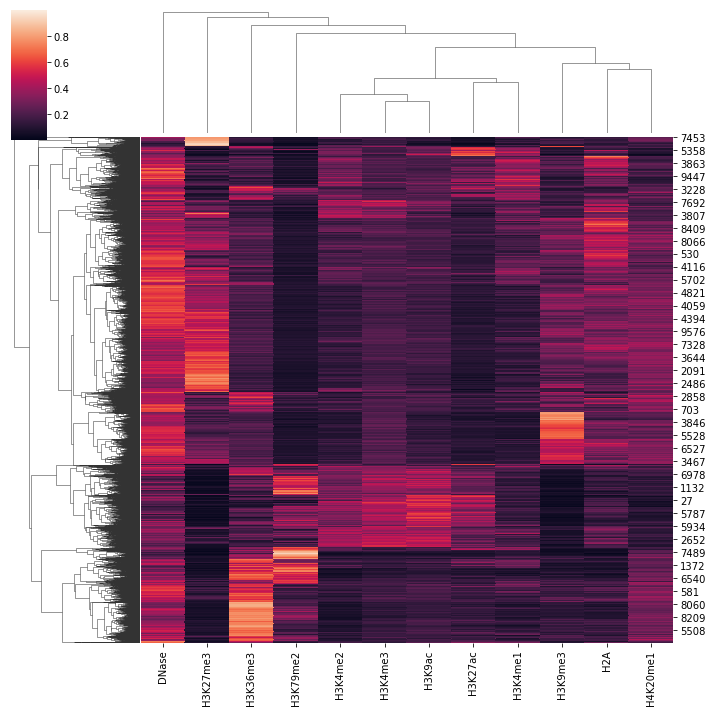

In [10]:
import seaborn as sns 

sns.clustermap(normalized_features)

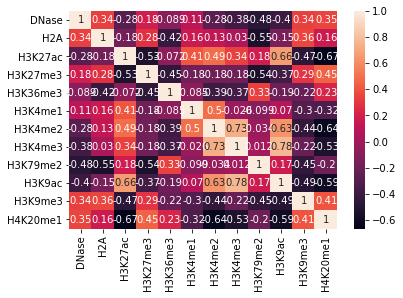

In [11]:
# generating correlation heatmap 
sns.heatmap(normalized_features.corr(), annot = True) 

plt.show() 

## Silhouette coefficient

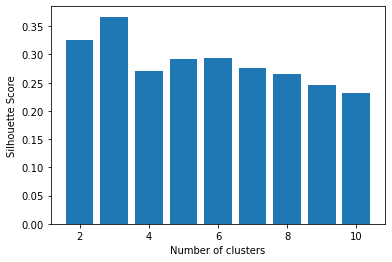

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [13]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [14]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=3, random_state=12)

In [15]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

1168.9258713939446
[[0.47629579 0.32457967 0.12183956 0.40138276 0.20427588 0.17628295
  0.17631305 0.21075766 0.08933439 0.17333143 0.32478608 0.29731568]
 [0.39257667 0.14093613 0.1617111  0.09526257 0.58134781 0.17861142
  0.12572581 0.1493173  0.35523062 0.16691475 0.14874034 0.29027565]
 [0.32536703 0.2114168  0.32753463 0.09393572 0.21006864 0.23133027
  0.33734256 0.36249084 0.26822356 0.38854485 0.08854814 0.13348177]]
8


In [16]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

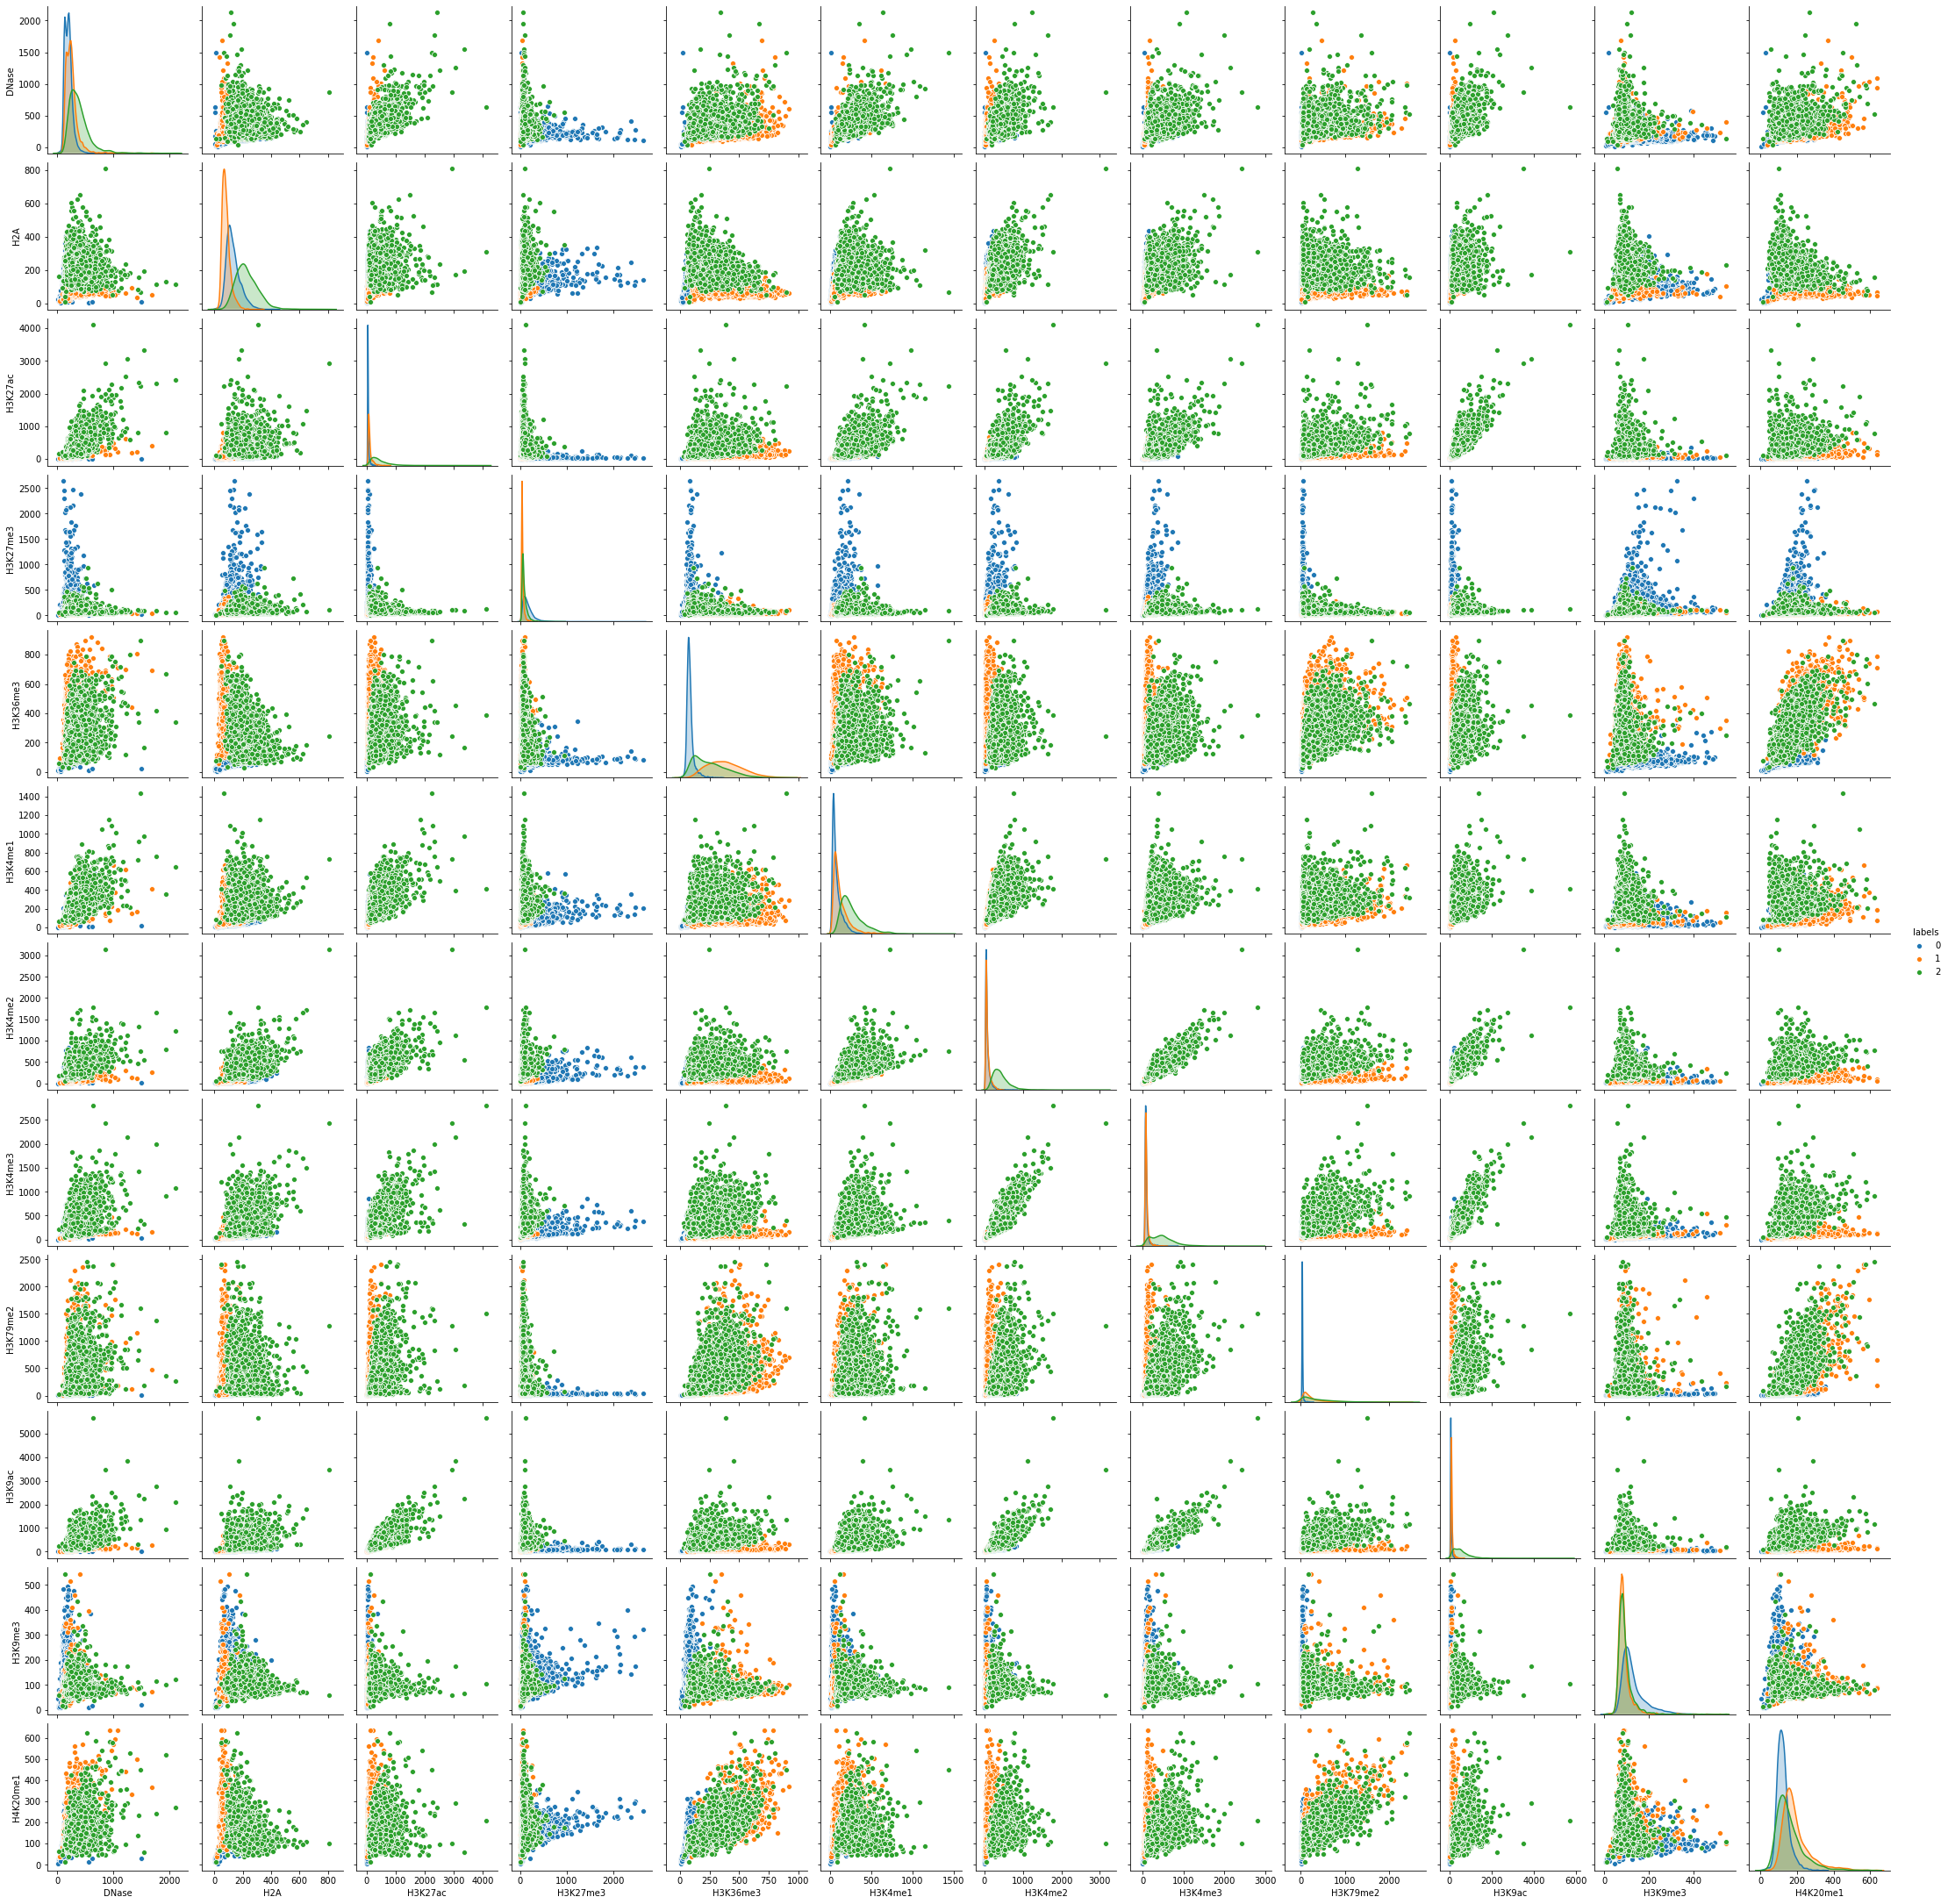

In [17]:
sns.pairplot(labeled,hue='labels')